# CAS Common Chemistry API in Python

By Vincent F. Scalfani and Avery Fernandez

The CAS Common Chemistry API provides programmatic access to a curated subset, offering information on nearly 500,000 chemical substances. This API supports integration into workflows for chemical research, machine learning, and cheminformatics applications.

> Registration is required to access the API. Please visit the links below to register.

Please see the following resources for more information on API usage:

- Documentation
  - <a href="https://commonchemistry.cas.org/api" target="_blank">CAS Common Chemistry API</a>
  - <a href="https://www.cas.org/services/commonchemistry-api" target="_blank">CAS Common Chemistry API Access Request</a>
- Terms
  - <a href="https://www.cas.org/legal" target="_blank">CAS Policies</a>
- Data Reuse
  - CAS Common Chemistry is provided under the <a href="https://creativecommons.org/licenses/by-nc/4.0/" target="_blank">Creative Commons CC BY-NC 4.0 license</a>

_**NOTE:**_ The CAS Common Chemistry API limits requests to a maximum of 50 results per page.

*These recipe examples were tested on May 7, 2025.* 

## Setup

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>
* <a href="https://github.com/pandas-dev/pandas" target="_blank">pandas</a>

We import the libraries used in this tutorial below:

In [1]:
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from IPython.display import SVG
from time import sleep
import pandas as pd

## 1. Common Chemistry Record Detail Retrieval

Information about substances in CAS Common Chemistry can be retrieved using the `/detail` endpoint and a CAS RN identifier.

In [2]:
# Set up API parameters
BASE_URL = "https://commonchemistry.cas.org/api/"
endpoint = "detail"
params = {
    "cas_rn": "10094-36-7"  # Ethyl cyclohexanepropionate
}

# Request data from CAS Common Chemistry Detail API
try:
    response = requests.get(f"{BASE_URL}{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=1)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'canonicalSmile': 'O=C(OCC)CCC1CCCCC1',
 'experimentalProperties': [...],
 'hasMolfile': True,
 'images': [...],
 'inchi': 'InChI=1S/C11H20O2/c1-2-13-11(12)9-8-10-6-4-3-5-7-10/h10H,2-9H2,1H3',
 'inchiKey': 'InChIKey=NRVPMFHPHGBQLP-UHFFFAOYSA-N',
 'molecularFormula': 'C<sub>11</sub>H<sub>20</sub>O<sub>2</sub>',
 'molecularMass': '184.28',
 'name': 'Ethyl cyclohexanepropionate',
 'propertyCitations': [...],
 'replacedRns': [],
 'rn': '10094-36-7',
 'smile': 'C(CC(OCC)=O)C1CCCCC1',
 'synonyms': [...],
 'uri': 'substance/pt/10094367'}


### Display the Molecule Drawing

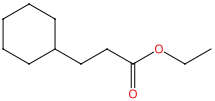

In [3]:
if data:
    svg_string = data["images"][0]
    # Display the molecule
    display(SVG(svg_string))

### Select Some Specific Data

In [4]:
# Get Experimental Properties
if data:
    pprint(data["experimentalProperties"][0])

{'name': 'Boiling Point',
 'property': '105-113 °C @ Press: 17 Torr',
 'sourceNumber': 1}


In [5]:
# Get Boiling Point property
if data:
    print(data["experimentalProperties"][0]["property"])

105-113 °C @ Press: 17 Torr


In [6]:
# Get InChIKey
if data:
    print(data["inchiKey"])

InChIKey=NRVPMFHPHGBQLP-UHFFFAOYSA-N


In [7]:
# Get Canonical SMILES
if data:
    print(data["canonicalSmile"])

O=C(OCC)CCC1CCCCC1


## 2. Common Chemistry API Record Detail Retrieval in a Loop

To obtain the data for multiple records, we request data for each CAS RN in a loop and save it to a list.

In [8]:
casrn_list = ["10094-36-7", "10031-92-2", "10199-61-8", "10036-21-2", "1019020-13-3"]

casrn_data_list = []
for casrn in casrn_list:
    params = {
        "cas_rn": casrn
    }

    try:
        response = requests.get(f"{BASE_URL}{endpoint}", params=params)
        # Add a delay between API calls
        sleep(1)
        # Raise an error for bad responses
        response.raise_for_status()
        casrn_data_list.append(response.json())
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [9]:
# View the first item
pprint(casrn_data_list[0], depth=1)

{'canonicalSmile': 'O=C(OCC)CCC1CCCCC1',
 'experimentalProperties': [...],
 'hasMolfile': True,
 'images': [...],
 'inchi': 'InChI=1S/C11H20O2/c1-2-13-11(12)9-8-10-6-4-3-5-7-10/h10H,2-9H2,1H3',
 'inchiKey': 'InChIKey=NRVPMFHPHGBQLP-UHFFFAOYSA-N',
 'molecularFormula': 'C<sub>11</sub>H<sub>20</sub>O<sub>2</sub>',
 'molecularMass': '184.28',
 'name': 'Ethyl cyclohexanepropionate',
 'propertyCitations': [...],
 'replacedRns': [],
 'rn': '10094-36-7',
 'smile': 'C(CC(OCC)=O)C1CCCCC1',
 'synonyms': [...],
 'uri': 'substance/pt/10094367'}


### Display Molecule Drawings

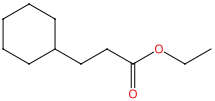

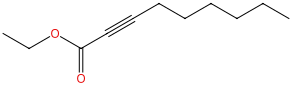

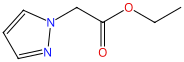

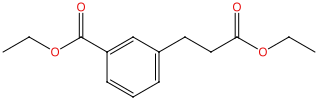

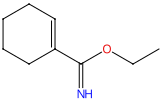

In [10]:
# Get SVG image text
svg_strings = []
for casrn_item in casrn_data_list:
    svg_strings.append(casrn_item["images"][0])

# Display the molecules
for svg_string in svg_strings:
    display(SVG(svg_string))

### Select Some Specific Data

In [ ]:
# Get Canonical SMILES
cansmiles = [item["canonicalSmile"] for item in casrn_data_list]
cansmiles

['O=C(OCC)CCC1CCCCC1',
 'O=C(C#CCCCCCC)OCC',
 'O=C(OCC)CN1N=CC=C1',
 'O=C(OCC)C1=CC=CC(=C1)CCC(=O)OCC',
 'N=C(OCC)C1=CCCCC1']

In [13]:
# Get Synonyms
synonyms_list = []
for casrn_item in casrn_data_list:
    # Since the synonyms are a list, we need to extend the list
    # Instead of appending to avoid nested lists
    synonyms_list.extend(casrn_item["synonyms"])
synonyms_list

['Cyclohexanepropanoic acid, ethyl ester',
 'Cyclohexanepropionic acid, ethyl ester',
 'Ethyl cyclohexanepropionate',
 'Ethyl cyclohexylpropanoate',
 'Ethyl 3-cyclohexylpropionate',
 'Ethyl 3-cyclohexylpropanoate',
 '3-Cyclohexylpropionic acid ethyl ester',
 'NSC 71463',
 'Ethyl 3-cyclohexanepropionate',
 '2-Nonynoic acid, ethyl ester',
 'Ethyl 2-nonynoate',
 'NSC 190985',
 '1<em>H</em>-Pyrazole-1-acetic acid, ethyl ester',
 'Pyrazole-1-acetic acid, ethyl ester',
 'Ethyl 1<em>H</em>-pyrazole-1-acetate',
 'Ethyl 1-pyrazoleacetate',
 'Ethyl 2-(1<em>H</em>-pyrazol-1-yl)acetate',
 'Benzenepropanoic acid, 3-(ethoxycarbonyl)-, ethyl ester',
 'Hydrocinnamic acid, <em>m</em>-carboxy-, diethyl ester',
 'Ethyl 3-(ethoxycarbonyl)benzenepropanoate',
 '1-Cyclohexene-1-carboximidic acid, ethyl ester',
 'Ethyl 1-cyclohexene-1-carboximidate']

### Create Pandas DataFrame

In [14]:
df = pd.json_normalize(casrn_data_list)
# Select specific columns to display
df_subset = df[["uri", "rn", "name", "inchiKey", "canonicalSmile", "molecularMass"]]
df

,uri,rn,name,images,inchi,inchiKey,smile,canonicalSmile,molecularFormula,molecularMass,experimentalProperties,propertyCitations,synonyms,replacedRns,hasMolfile
0,substance/pt/10094367,10094-36-7,Ethyl cyclohexanepropionate,"[<svg width=""215"" viewBox=""0 0 215 101"" style=...",InChI=1S/C11H20O2/c1-2-13-11(12)9-8-10-6-4-3-5...,InChIKey=NRVPMFHPHGBQLP-UHFFFAOYSA-N,C(CC(OCC)=O)C1CCCCC1,O=C(OCC)CCC1CCCCC1,C<sub>11</sub>H<sub>20</sub>O<sub>2</sub>,184.28,"[{'name': 'Boiling Point', 'property': '105-11...","[{'docUri': 'document/pt/document/22252593', '...","[Cyclohexanepropanoic acid, ethyl ester, Cyclo...",[],True
1,substance/pt/10031922,10031-92-2,Ethyl 2-nonynoate,"[<svg width=""292"" viewBox=""0 0 292 86"" style=""...",InChI=1S/C11H18O2/c1-3-5-6-7-8-9-10-11(12)13-4...,InChIKey=BFZNMUGAZYAMTG-UHFFFAOYSA-N,C(C#CCCCCCC)(OCC)=O,O=C(C#CCCCCCC)OCC,C<sub>11</sub>H<sub>18</sub>O<sub>2</sub>,182.26,[],[],"[2-Nonynoic acid, ethyl ester, Ethyl 2-nonynoa...",[],True
2,substance/pt/10199618,10199-61-8,Ethyl 1<em>H</em>-pyrazole-1-acetate,"[<svg width=""184"" viewBox=""0 0 184 62"" style=""...",InChI=1S/C7H10N2O2/c1-2-11-7(10)6-9-5-3-4-8-9/...,InChIKey=SEHJVNBWAGPXSM-UHFFFAOYSA-N,C(C(OCC)=O)N1C=CC=N1,O=C(OCC)CN1N=CC=C1,C<sub>7</sub>H<sub>10</sub>N<sub>2</sub>O<sub>...,154.17,"[{'name': 'Boiling Point', 'property': '130 °C...","[{'docUri': 'document/pt/document/17362219', '...","[1<em>H</em>-Pyrazole-1-acetic acid, ethyl est...",[],True
3,substance/pt/10036212,10036-21-2,Ethyl 3-(ethoxycarbonyl)benzenepropanoate,"[<svg width=""318"" viewBox=""0 0 318 101"" style=...",InChI=1S/C14H18O4/c1-3-17-13(15)9-8-11-6-5-7-1...,InChIKey=HDGSRVUQMHJTDH-UHFFFAOYSA-N,C(OCC)(=O)C1=CC(CCC(OCC)=O)=CC=C1,O=C(OCC)C1=CC=CC(=C1)CCC(=O)OCC,C<sub>14</sub>H<sub>18</sub>O<sub>4</sub>,250.29,[],[],"[Benzenepropanoic acid, 3-(ethoxycarbonyl)-, e...",[],True
4,substance/pt/1019020133,1019020-13-3,Ethyl 1-cyclohexene-1-carboximidate,"[<svg width=""163"" viewBox=""0 0 163 101"" style=...",InChI=1S/C9H15NO/c1-2-11-9(10)8-6-4-3-5-7-8/h6...,InChIKey=OYGZRJWLVOOMBM-UHFFFAOYSA-N,C(OCC)(=N)C=1CCCCC1,N=C(OCC)C1=CCCCC1,C<sub>9</sub>H<sub>15</sub>NO,153.22,[],[],"[1-Cyclohexene-1-carboximidic acid, ethyl este...",[],True


## 3. Common Chemistry Search

In addition to the `/detail` API, the CAS Common Chemistry API has a `/search` method that allows searching by CAS RN, SMILES, InChI/InChIKey, and name.  

In [15]:
endpoint = "search"
params = {
    # InChIKey for Quinine
    "q": "InChIKey=LOUPRKONTZGTKE-WZBLMQSHSA-N",
}

try:
    response = requests.get(f"{BASE_URL}{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=3)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'count': 1,
 'results': [{'images': [...], 'name': 'Quinine', 'rn': '130-95-0'}]}


Note that with the CAS Common Chemistry Search API, only the image data, name, and CAS RN is returned. In order to retrieve the full record, we can combine our search with the related detail API:

In [ ]:
# Extract CAS RN
if data:
    quinine_rn = data["results"][0]["rn"]
else:
    quinine_rn = None
quinine_rn

'130-95-0'

In [17]:
# Get detailed record for quinine
endpoint = "detail"
if quinine_rn:
    params = {
        # Quinine CAS RN
        "cas_rn": quinine_rn
    }
    try:
        response = requests.get(f"{BASE_URL}{endpoint}", params=params)
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        pprint(data, depth=1)
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        data = None
else:
    data = None

{'canonicalSmile': 'OC(C=1C=CN=C2C=CC(OC)=CC21)C3N4CCC(C3)C(C=C)C4',
 'experimentalProperties': [...],
 'hasMolfile': True,
 'images': [...],
 'inchi': 'InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10-19(22)20(23)16-6-8-21-18-5-4-15(24-2)11-17(16)18/h3-6,8,11,13-14,19-20,23H,1,7,9-10,12H2,2H3/t13-,14-,19-,20+/m0/s1',
 'inchiKey': 'InChIKey=LOUPRKONTZGTKE-WZBLMQSHSA-N',
 'molecularFormula': 'C<sub>20</sub>H<sub>24</sub>N<sub>2</sub>O<sub>2</sub>',
 'molecularMass': '324.42',
 'name': 'Quinine',
 'propertyCitations': [...],
 'replacedRns': [...],
 'rn': '130-95-0',
 'smile': '[C@@H](O)(C=1C2=C(C=CC(OC)=C2)N=CC1)[C@]3([N@@]4C[C@H](C=C)[C@](C3)(CC4)[H])[H]',
 'synonyms': [...],
 'uri': 'substance/pt/130950'}


### Handle Multiple Results

In [18]:
# Set up search query parameters
endpoint = "search"
params = {
    # SMILES for butadiene
    "q": "C=CC=C"
}

In [19]:
# Request data from CAS Common Chemistry Search API
try:
    response = requests.get(f"{BASE_URL}{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

In [21]:
# Get results count
if data:
    print(data["count"])

7


In [22]:
# Extract out CAS RNs
smi_casrn_list = []
if data:
    for item in data["results"]:
        smi_casrn_list.append(item["rn"])
smi_casrn_list

['106-99-0',
 '16422-75-6',
 '26952-74-9',
 '29406-96-0',
 '29989-19-3',
 '31567-90-5',
 '9003-17-2']

In [23]:
# Now use the detail API to retrieve the full records
endpoint = "detail"

smi_detail_data = []
for casrn in smi_casrn_list:
    params = {
        "cas_rn": casrn
    }

    try:
        response = requests.get(f'{BASE_URL}{endpoint}', params=params)
        # Add a delay between API calls
        sleep(1) 
        # Raise an error for bad responses
        response.raise_for_status()
        smi_detail_data.append(response.json())
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [ ]:
# Get names from the detail records
names = [item["name"] for item in smi_detail_data]
names

['1,3-Butadiene',
 'Butadiene trimer',
 'Butadiene dimer',
 '1,3-Butadiene, homopolymer, isotactic',
 '1,3-Butadiene-<em>1</em>,<em>1</em>,<em>2</em>,<em>3</em>,<em>4</em>,<em>4</em>-<em>d</em><sub>6</sub>, homopolymer',
 'Syndiotactic polybutadiene',
 'Polybutadiene']

### Handle Multiple Page Results

The CAS Common Chemistry API returns 50 results per page, and only the first page is returned by default. If the search returns more than 50 results, the offset option can be added to page through and obtain all results:

In [31]:
# Set up search query parameters
endpoint = "search"
params = {
    "q": "selen*"
}

In [32]:
# Get results count for CAS Common Chemistry Search
try:
    response = requests.get(f"{BASE_URL}{endpoint}", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

In [33]:
if data:
    num_results = data["count"]
    print(num_results)

194


In [39]:
# Request data and save to a list in a loop for each page
search_data_list = []
if data:
    # Split the search into pages of 50 results each
    for page_idx in range(int(num_results/50 + 1)):
        params = {
            "q": "selen*",
            "offset": page_idx * 50
        }
        try:
            response = requests.get(BASE_URL + endpoint, params=params)
            # Add a delay between API calls
            sleep(1)
            # Raise an error for bad responses
            response.raise_for_status()
            search_data_list.extend(response.json()['results'])
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")

len(search_data_list)

194

In [41]:
# We can index and extract out the first casrn like this
search_data_list[0]["rn"]

'10025-68-0'

In [43]:
# Extract out all CAS RNs from the list of lists
casrn_list = [item["rn"] for item in search_data_list]

# Show first 10
pprint(casrn_list[:10])

['10025-68-0',
 '10026-03-6',
 '10026-23-0',
 '10101-96-9',
 '10102-18-8',
 '10102-23-5',
 '10112-94-4',
 '10161-84-9',
 '10214-40-1',
 '10236-58-5']


In [44]:
# Now we can loop through each casrn and use the detail API to obtain the entire record
# This will take about 5 minutes
endpoint = "detail"
detail_data_list = []
for casrn in casrn_list:
    params = {
        "cas_rn": casrn
    }
    try:
        response = requests.get(f'{BASE_URL}{endpoint}', params=params)
        # Add a delay between API calls
        sleep(1)
        # Raise an error for bad responses
        response.raise_for_status()
        detail_data_list.append(response.json())
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [ ]:
# Extract out some data such as molecularMass
mms = [item["molecularMass"] for item in detail_data_list]

len(mms)

194

In [47]:
# View first 20
# Note that several do not have molecularMass values and have an empty string in the record
mms[:20]

['228.82',
 '220.77',
 '187.91',
 '187.67',
 '174.95',
 '371.11',
 '167.96',
 '300.24',
 '192.52',
 '168.05',
 '410.78',
 '207.17',
 '586.23',
 '431.38',
 '167.20',
 '241.11',
 '192.07',
 '368.25',
 '265.00',
 '']

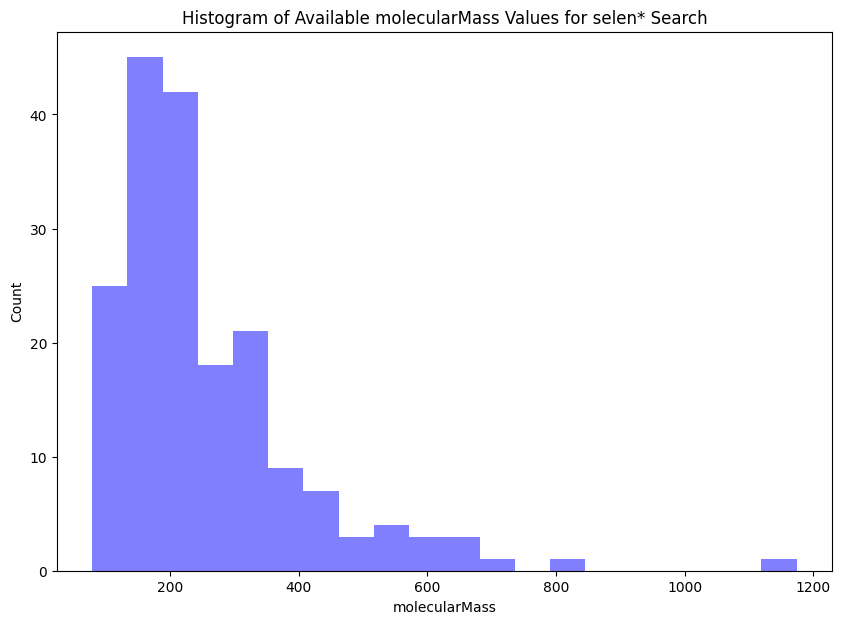

In [49]:
# Finally, we can even quickly create a simple visualization from the
# Extracted molecularMass values (from the selen* search)

# Remove empty strings
mms_values = list(filter(None, mms))

# Convert to floats
mms_values_float = [float(mms_value) for mms_value in mms_values]

# Plot data
plt.figure(figsize=(10,7))
plt.hist(mms_values_float, histtype='bar',bins = 20, facecolor="blue", alpha=0.5)
plt.title("Histogram of Available molecularMass Values for selen* Search")
plt.xlabel("molecularMass")
plt.ylabel("Count")
plt.show()